# Part I. Poly-alphabetic Ciphers
For this part of the assignment, you are given enciphered English text and a hint about the encryption
algorithm that was used. Your mission: Develop the necessary (software) tools and use them to help
you produce plaintext.

## Task1.
This text was enciphered using a polyalphabetic substitution cipher, where the key length was no larger than 10. Blank spaces were first deleted and then inserted at convenient locations. 

* Hints: In the ciphertext the letters were first converted to upper case thus the alphabet substitutions
consist of permutations of the 26 upper case letters A through Z. Spaces were removed before encryption
and reinserted after encryption. Suppose that substitution 1 maps A to X, and substitution 2 maps B to Y.
The plaintext message “AB ABAB ABA” (with spaces) might be converted to the ciphertext “XYXYX YXYX”.
You might consider using the statistical analysis techniques discussed in class to crack these problems.

```Python
BQZRMQ KLBOXE WCCEFL DKRYYL BVEHIZ NYJQEE BDYFJO PTLOEM EHOMIC UYHHTS GKNJFG
EHIMK NIHCTI HVRIHA RSMGQT RQCSXX CSWTNK PTMNSW AMXVCY WEOGSR FFUEEB DKQLQZ
WRKUCO FTPLOT GOJZRI XEPZSE ISXTCT WZRMXI RIHALE SPRFAE FVYORI HNITRG PUHITM
CFCDLA HIBKLH RCDIMT WQWTOR DJCNDY YWMJCN HDUWOF DPUPNG BANULZ NGYPQU
LEUXOV FFDCEE YHQUXO YOXQUO DDCVIR RPJCAT RAQVFS AWMJCN HTSOXQ UODDAG
BANURR REZJGD VJSXOO MSDNIT RGPUHN HRSSSF VFSINH MSGPCM ZJCSLY GEWGQT DREASV
FPXEAR IMLPZW EHQGMG WSEIXE GQKPRM XIBFWL IPCHYM OTNXYV FFDCEE YHASBA TEXCJZ
VTSGBA NUDYAP IUGTLD WLKVRI HWACZG PTRYCE VNQCUP AOSPEU KPCSNG RIHLRI KUMGFC
YTDQES DAHCKP BDUJPX KPYMBD IWDQEF WSEVKT CDDWLI NEPZSE OPYIW
```

### Preamble:
Based on image below the most common bigrams are:
* TH, HE, IN, ER, AN, RE, ON, AT, EN, ND, TI, ES, OR, TE, OF, ED, IS, IT

![Bigram Frequency Top](../Assets/bigramfreqtoplist.png)
![Brigram Matrix](../Assets/bigramfreqmatrix2.png)
![Bigram Frequency](../Assets/bigramfreqtop.png)


In [1]:
import matplotlib.pyplot as plt

In [2]:
## Function utils
def removeSpecialChars(text):
    return text.lower().replace(' ','').replace('\n','')

def crypt(key,text,encrypt=True):
    text = removeSpecialChars(text)
    key_length = len(key)
    retVal = ''
    alphabet = [chr(i+97) for i in range(26)]
    for i in range(len(text)):
        word = text[i]
        k_offset = alphabet.index(key[i%key_length])
        if not encrypt :
            k_offset *= -1 
        cipher =  alphabet.index(word) +  k_offset
        cipher = cipher % len(alphabet)
        retVal +=  alphabet[cipher]
    return retVal.upper()

def remove_dict_vals(dict_vals, threshold):
    if threshold:
        for key in list(dict_vals.keys()):
            if dict_vals[key] <= threshold:
                del dict_vals[key]
    return dict_vals

def getWordFreq(text,threshold_freq = None):
    """
        Returns the word frequency of a given string sorted from higher to lower
    """
    retval =dict()
    for term in text:
        retval[term] = 1 if not term in retval else retval[term] + 1
    retval = {k: v for k, v in sorted(retval.items(), key=lambda item: item[1],reverse=True)}
    total_words = sum(retval.values())
    for key in retval.keys():
        retval[key] = round(retval[key]/total_words,2)*100 
     
    retval = remove_dict_vals(retval,threshold_freq)
    return retval

def findNgrams(text,ngram_length,threshold_freq = None):
    ngram_freq = {}
    i = 0
    text_length = len(text)
    while i < len(text):
        offset = text_length - i if  i + ngram_length > text_length else i + ngram_length
        ngram =  text[i:offset]
        ngram_freq[ngram] = 1 if ngram not in ngram_freq else ngram_freq[ngram] + 1
        i += 1
    retval = {k: v for k, v in sorted(ngram_freq.items(), key=lambda item: item[1],reverse=True)} 
    retval = remove_dict_vals(retval,threshold_freq)
    return retval
        
def getShortestPatternDistance(text,pattern):
    pattern_length = len(pattern)
    pattern_found = False
    last_distance = len(text)
    current_distance = 0
    for i in range(len(text)):
        chunk = text[i:i+pattern_length]
        if chunk == pattern:
            if pattern_found:
                current_distance -= pattern_length
                if current_distance < last_distance:
                    last_distance = current_distance
                    current_distance = 0
            else:
                pattern_found = True
        else:
            if pattern_found:
                current_distance +=1
    return last_distance

def getCharPattern(text,pattern,offset):
    pattern_length = len(pattern)
    pattern_found = False
    retval = []
    for i in range(len(text)):
        chunk = text[i:i+pattern_length]
        if chunk == pattern:
            retval.append(text[i:i + offset])
    return retval


## Testing encryption/decryption algorithm for polyalphabetic cipher:
![Image from book should match algorithm](../Assets/cypher_book.png)

In [3]:
# Confirming from given text and key that the encryption algorithm works:
key = 'deceptive'
text = 'we are discovered save yourself'
c_text = crypt(key,text,encrypt=True)
d_text = crypt(key,c_text,encrypt=False)
print(c_text)
print(d_text)

ZICVTWQNGRZGVTWAVZHCQYGLMGJ
WEAREDISCOVEREDSAVEYOURSELF


The fact that repeating letters can be found means two things : either a same sequence of letter of the plaintext is crypted with the same part of the key, either different sequences letters are crypted with different parts of the key but they ends with the same crypted letters. this second possibility is poorly probable.

By analyzing the gaps between two identical redunding sequences, an attacker can find multiples of the key length. By analyzing each gaps in term of number of letters, and by calculating divisors, an attacker can deduct with a high probability the size of the key.

Example: Positions of ABC are 0, 6 et 18

bqzrmqklboxewccefldkryylbvehiznyjqeebdyfjoptloemehomicuyhhtsgknjfgehimknihctihvriharsmgqtrqcsxxcswtnkptmnswamxvcyweogsrffueebdkqlqzwrkucoftplotgojzrixepzseisxtctwzrmxirihalesprfaefvyorihnitrgpuhitmcfcdlahibklhrcdimtwqwtordjcndyywmjcnhduwofdpupngbanulzngypquleuxovffdceeyhquxoyoxquoddcvirrpjcatraqvfsawmjcnhtsoxquoddagbanurrrezjgdvjsxoomsdnitrgpuhnhrsssfvfsinhmsgpcmzjcslygewgqtdreasvfpxearimlpzwehqgmgwseixegqkprmxibfwlipchymotnxyvffdceeyhasbatexcjzvtsgbanudyapiugtldwlkvrihwaczgptrycevnqcupaospeukpcsngrihlrikumgfcytdqesdahckpbdujpxkpymbdiwdqefwsevktcddwlinepzseopyiw


<BarContainer object of 3 artists>

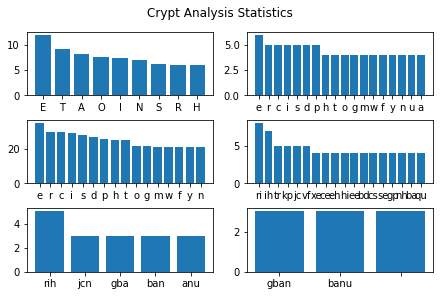

In [4]:
## Task 1 Solution
cryptoText = '''BQZRMQ KLBOXE WCCEFL DKRYYL BVEHIZ NYJQEE BDYFJO PTLOEM EHOMIC UYHHTS GKNJFG
EHIMK NIHCTI HVRIHA RSMGQT RQCSXX CSWTNK PTMNSW AMXVCY WEOGSR FFUEEB DKQLQZ
WRKUCO FTPLOT GOJZRI XEPZSE ISXTCT WZRMXI RIHALE SPRFAE FVYORI HNITRG PUHITM
CFCDLA HIBKLH RCDIMT WQWTOR DJCNDY YWMJCN HDUWOF DPUPNG BANULZ NGYPQU
LEUXOV FFDCEE YHQUXO YOXQUO DDCVIR RPJCAT RAQVFS AWMJCN HTSOXQ UODDAG
BANURR REZJGD VJSXOO MSDNIT RGPUHN HRSSSF VFSINH MSGPCM ZJCSLY GEWGQT DREASV
FPXEAR IMLPZW EHQGMG WSEIXE GQKPRM XIBFWL IPCHYM OTNXYV FFDCEE YHASBA TEXCJZ
VTSGBA NUDYAP IUGTLD WLKVRI HWACZG PTRYCE VNQCUP AOSPEU KPCSNG RIHLRI KUMGFC
YTDQES DAHCKP BDUJPX KPYMBD IWDQEF WSEVKT CDDWLI NEPZSE OPYIW'''
cryptoText = removeSpecialChars(cryptoText)
print(cryptoText)
word_freq = getWordFreq(cryptoText,threshold_freq=3)
ngrams_1 = findNgrams(cryptoText,1,threshold_freq=20)
ngrams_2 = findNgrams(cryptoText,2,threshold_freq=3)
ngrams_3 = findNgrams(cryptoText,3,threshold_freq=2)
ngrams_4 = findNgrams(cryptoText,4,2)

fig, axs = plt.subplots(3, 2,constrained_layout=True)
fig.suptitle('Crypt Analysis Statistics')
eng_word_freq = {'E':12.02,'T':9.10,'A':8.12,'O':7.68,'I':7.31,'N':6.95,'S':6.28,'R':6.02,'H':5.92,'D':4.32,'L':3.98,'U':2.88,'C':2.71,'M':2.61,'F':2.30,'Y':2.11,'W':2.09,'G':2.03,'P':1.82,'B':1.49,'V':1.11,'K':0.69,'X':0.17,'Q':0.11,'J':0.10,'Z':0.07}
eng_word_freq = remove_dict_vals(eng_word_freq, 5)

axs[0,0].bar(eng_word_freq.keys(), eng_word_freq.values())
axs[0,1].bar(word_freq.keys(),  word_freq.values())
axs[1,0].bar(ngrams_1.keys(),   ngrams_1.values())
axs[1,1].bar(ngrams_2.keys(),   ngrams_2.values())
axs[2,0].bar(ngrams_3.keys(),   ngrams_3.values())
axs[2,1].bar(ngrams_4.keys(),   ngrams_4.values())


In [5]:
english_2gram = 'thheineranre'
crypted_2gram = 'riihtrkpjcvf'
key_2gram = crypt(english_2gram,crypted_2gram,encrypt=False)

english_3gram = 'theandthaenting'
crypted_3gram = 'rihjcngbabananu'
key_3gram = crypt(english_3gram,crypted_3gram,encrypt=False)
print(f'2-gram key is {key_2gram}')
print(f'3-gram key is {key_3gram}')

2-gram key is YBBDLEGYJPEB
3-gram key is YBDJPKNUAXNUSAO


Let's assume then that the found bigrams and trigrams match the english pattern:

---

### Englsh alphabet with its indexes
|Letter   |A|B|C|D|E|F|G|H|I|J|K |L |M |N |O |P |Q |R |S |T |U |V |W |X |Y |Z |
|----     |-|-|-|-|-|-|-|-|-|-|- |- |- |- |- |- |- |- |- |- |- |- |- |- |- |- |
|**Index**|0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19|20|21|22|23|24|25|

---

| [English 2-Gram Frequency](https://en.wikipedia.org/wiki/Bigram) | TH  | HE  | IN  | ER  | AN  | RE |
| ---                      | --- | --- | --- | --- | --- |--- |
| **Cipher**               | RI  | IH  | TR  | KP  | JC  | VF |
| **Candidate Key**        | YB  | BD  | LE  | GY  | JP  | EB |
---

| [English 3-Gram Frequency](https://en.wikipedia.org/wiki/Trigram)  | THE | AND | THA | ENT | ING | ION| TIO| FOR|
| ---                       | --- | --- | --- | --- | --- |--- |--- |--- |
| **Cipher**                | RIH | JCN | GBA | BAN | ANU |    |    |    |
| **Candidate Key**         | YBD | JPK | NUA | ZNU | SAO |    |    |    |

As we can see from the following analysis for 2-gram and 3-gram the first 3 candidate keys match each other, therefore thereis a great possibility the key contains these characters.



In [6]:
n_gram2_distance = getShortestPatternDistance(cryptoText,'ri')
n_gram3_distance = getShortestPatternDistance(cryptoText,'rih')
print(f'Shortest distance for 2-gram:{n_gram2_distance}')
print(f'Shortest distance for 3-gram:{n_gram3_distance}')


Shortest distance for 2-gram:13
Shortest distance for 3-gram:12


Let's split now crypto text by 2-gram 'ri' and get the 3rd encrypted char by assuming part of the key is **YBD**

## Now let's sweep a string of encrypted text by its primary candidate key,
The estimated candidate key is 'YBDL', it is possible then to sweep it and increase on each iteration the length of the key to loop for potential word patterns which are similar to english

In [20]:
ngram_2_length = 64
candidate_key = 'ybdl'
n_gram = 'rih'
max_key_len = 11
candidate_key_len = len(candidate_key)
ngram_2_patterns = getCharPattern(cryptoText,n_gram,ngram_2_length)
for i in range(candidate_key_len, max_key_len,1):
    print(f'Sweeping {n_gram} with key length = {i} ({candidate_key})...\n')
    #Decrypt text by candidate key
    ngram_2_decipher = [(x,crypt(candidate_key,x,encrypt=False)) for x in ngram_2_patterns]
    chunk_size = len(candidate_key)
    for item in ngram_2_decipher:
        items_c = []
        items_d = []
        for i in range(0,ngram_2_length,chunk_size):
            items_c.append(item[0][i:i+chunk_size])
            items_d.append(item[1][i:i+chunk_size])
        print(items_c)
        print(items_d)
        print('\n')
    candidate_key +='a'


Sweeping rih with key length = 4 (ybdl)...

['riha', 'rsmg', 'qtrq', 'csxx', 'cswt', 'nkpt', 'mnsw', 'amxv', 'cywe', 'ogsr', 'ffue', 'ebdk', 'qlqz', 'wrku', 'coft', 'plot']
['THEP', 'TRJV', 'SSOF', 'ERUM', 'ERTI', 'PJMI', 'OMPL', 'CLUK', 'EXTT', 'QFPG', 'HERT', 'GAAZ', 'SKNO', 'YQHJ', 'ENCI', 'RKLI']


['riha', 'lesp', 'rfae', 'fvyo', 'rihn', 'itrg', 'puhi', 'tmcf', 'cdla', 'hibk', 'lhrc', 'dimt', 'wqwt', 'ordj', 'cndy', 'ywmj']
['THEP', 'NDPE', 'TEXT', 'HUVD', 'THEC', 'KSOV', 'RTEX', 'VLZU', 'ECIP', 'JHYZ', 'NGOR', 'FHJI', 'YPTI', 'QQAY', 'EMAN', 'AVJY']


['rihn', 'itrg', 'puhi', 'tmcf', 'cdla', 'hibk', 'lhrc', 'dimt', 'wqwt', 'ordj', 'cndy', 'ywmj', 'cnhd', 'uwof', 'dpup', 'ngba']
['THEC', 'KSOV', 'RTEX', 'VLZU', 'ECIP', 'JHYZ', 'NGOR', 'FHJI', 'YPTI', 'QQAY', 'EMAN', 'AVJY', 'EMES', 'WVLU', 'FORE', 'PFYP']


['rihw', 'aczg', 'ptry', 'cevn', 'qcup', 'aosp', 'eukp', 'csng', 'rihl', 'riku', 'mgfc', 'ytdq', 'esda', 'hckp', 'bduj', 'pxkp']
['THEL', 'CBWV', 'RSON', 'EDSC', 'SBRE', 'CNPE'

Seems like the most suiteable key length  is 8 since it has clearer string patterns for candidate english words.


1.
* 'riharsmg', 'qtrqcsxx', 'cswtnkpt', 'mnswamxv', 'cyweogsr', 'ffueebdk', 'qlqzwrku', 'coftplot'
* 'THEPRSMG', 'SSOFCSXX', 'ERTINKPT', 'OMPLAMXV', 'EXTTOGSR', 'HERTEBDK', 'SKNOWRKU', 'ENCIPLOT'
---
2.
* 'rihalesp', 'rfaefvyo', 'rihnitrg', 'puhitmcf', 'cdlahibk', 'lhrcdimt', 'wqwtordj', 'cndyywmj'
* 'THEPLESP', 'TEXTFVYO', 'THECITRG', 'RTEXTMCF', 'ECIPHIBK', 'NGORDIMT', 'YPTIORDJ', 'EMANYWMJ'

---
3.
* 'rihnitrg', 'puhitmcf', 'cdlahibk', 'lhrcdimt', 'wqwtordj', 'cndyywmj', 'cnhduwof', 'dpupngba'
* 'THECITRG', 'RTEXTMCF', 'ECIPHIBK', 'NGORDIMT', 'YPTIORDJ', 'EMANYWMJ', 'EMESUWOF', 'FORENGBA'

---
4.
* 'rihwaczg', 'ptrycevn', 'qcupaosp', 'eukpcsng', 'rihlriku', 'mgfcytdq', 'esdahckp', 'bdujpxkp'
* 'THELACZG', 'RSONCEVN', 'SBREAOSP', 'GTHECSNG', 'THEARIKU', 'OFCRYTDQ', 'GRAPHCKP', 'DCRYPXKP'

---
5.
* 'rihlriku', 'mgfcytdq', 'esdahckp', 'bdujpxkp', 'ymbdiwdq', 'efwsevkt', 'cddwline', 'pzseopyi'
* 'THEARIKU', 'OFCRYTDQ', 'GRAPHCKP', 'DCRYPXKP', 'ALYSIWDQ', 'GETHEVKT', 'ECALLINE', 'RYPTOPYI'

---

Take a special look at 2:

* 'rihalesp', 'rfaefvyo', 'rihnitrg', 'puhitmcf', 'cdlahibk', 'lhrcdimt', 'wqwtordj', 'cndyywmj'
* 'THEPLESP', 'TEXTFVYO', 'THECITRG', 'RTEXTMCF', 'ECIPHIBK', 'NGORDIMT', 'YPTIORDJ', 'EMANYWMJ'


Assume these chunks to be part of the words: 

1. 'puhitmcf' = 'RTEXTMC**D**' (since the following decrypted chunk is 'ECIPHIBK', it is assumed the word 'deciph'/'decipher' is possible candidate )

In [26]:
def try_decipher(key,patterns,ngram_2_length):
    print(f'New decipher with key:{key}')
    ngram_2_decipher = [(x,crypt(key,x,encrypt=False)) for x in patterns]
    chunk_size = len(key)
    for item in ngram_2_decipher:
        items_c = []
        items_d = []
        for i in range(0,ngram_2_length,chunk_size):
            items_c.append(item[0][i:i+chunk_size])
            items_d.append(item[1][i:i+chunk_size])
        print(items_c)
        print(items_d)
        print('\n')


In [27]:
candidate_key = 'ybdlaaa' + crypt('d','f',encrypt=False).lower()
try_decipher(candidate_key,ngram_2_patterns,ngram_2_length)



New decipher with key:ybdlaaac
['riharsmg', 'qtrqcsxx', 'cswtnkpt', 'mnswamxv', 'cyweogsr', 'ffueebdk', 'qlqzwrku', 'coftplot']
['THEPRSME', 'SSOFCSXV', 'ERTINKPR', 'OMPLAMXT', 'EXTTOGSP', 'HERTEBDI', 'SKNOWRKS', 'ENCIPLOR']


['rihalesp', 'rfaefvyo', 'rihnitrg', 'puhitmcf', 'cdlahibk', 'lhrcdimt', 'wqwtordj', 'cndyywmj']
['THEPLESN', 'TEXTFVYM', 'THECITRE', 'RTEXTMCD', 'ECIPHIBI', 'NGORDIMR', 'YPTIORDH', 'EMANYWMH']


['rihnitrg', 'puhitmcf', 'cdlahibk', 'lhrcdimt', 'wqwtordj', 'cndyywmj', 'cnhduwof', 'dpupngba']
['THECITRE', 'RTEXTMCD', 'ECIPHIBI', 'NGORDIMR', 'YPTIORDH', 'EMANYWMH', 'EMESUWOD', 'FORENGBY']


['rihwaczg', 'ptrycevn', 'qcupaosp', 'eukpcsng', 'rihlriku', 'mgfcytdq', 'esdahckp', 'bdujpxkp']
['THELACZE', 'RSONCEVL', 'SBREAOSN', 'GTHECSNE', 'THEARIKS', 'OFCRYTDO', 'GRAPHCKN', 'DCRYPXKN']


['rihlriku', 'mgfcytdq', 'esdahckp', 'bdujpxkp', 'ymbdiwdq', 'efwsevkt', 'cddwline', 'pzseopyi']
['THEARIKS', 'OFCRYTDO', 'GRAPHCKN', 'DCRYPXKN', 'ALYSIWDO', 'GETHEVKR', 'ECALLINC', 'RY

The codes now seem very congruent,  now let's try to find another part of the key:

    'esdahckp', 'bdujpxkp'
    'OFCRYPTO', 'GRAPHCKN' = 'OFCRYPTO GRAPHYKN'

In [ ]:
def bruteForce(pattern, key, max_key_len, alphabet):
    if len(key) < max_key_len:
        for letter in alphabet:
            bruteForce(pattern, key + letter,max_key_len ,alphabet)
    else:
        decipher = crypt(key,pattern,encrypt=False)
        print(f'key {key}:{decipher}')

In [157]:
#bruteForce(ngram_2_patterns[0], 'ybdl',8,alphabet)



'riharsmgqtrqcsxxcswtnkptmnswamxvcyweogsrffueebdkqlqzwrkucoftplot'

In [37]:
key_part =  crypt('pt','td',encrypt=False).lower()
print(key_part)

ek


Then the new key could be 'ybdlanrc'


In [41]:
candidate_key = 'ybdlaekc' 
try_decipher(candidate_key,ngram_2_patterns,ngram_2_length)

New decipher with key:ybdlaekc
['riharsmg', 'qtrqcsxx', 'cswtnkpt', 'mnswamxv', 'cyweogsr', 'ffueebdk', 'qlqzwrku', 'coftplot']
['THEPROCE', 'SSOFCONV', 'ERTINGFR', 'OMPLAINT', 'EXTTOCIP', 'HERTEXTI', 'SKNOWNAS', 'ENCIPHER']


['rihalesp', 'rfaefvyo', 'rihnitrg', 'puhitmcf', 'cdlahibk', 'lhrcdimt', 'wqwtordj', 'cndyywmj']
['THEPLAIN', 'TEXTFROM', 'THECIPHE', 'RTEXTISD', 'ECIPHERI', 'NGORDECR', 'YPTIONTH', 'EMANYSCH']


['rihnitrg', 'puhitmcf', 'cdlahibk', 'lhrcdimt', 'wqwtordj', 'cndyywmj', 'cnhduwof', 'dpupngba']
['THECIPHE', 'RTEXTISD', 'ECIPHERI', 'NGORDECR', 'YPTIONTH', 'EMANYSCH', 'EMESUSED', 'FORENCRY']


['rihwaczg', 'ptrycevn', 'qcupaosp', 'eukpcsng', 'rihlriku', 'mgfcytdq', 'esdahckp', 'bdujpxkp']
['THELAYPE', 'RSONCALL', 'SBREAKIN', 'GTHECODE', 'THEAREAS', 'OFCRYPTO', 'GRAPHYAN', 'DCRYPTAN']


['rihlriku', 'mgfcytdq', 'esdahckp', 'bdujpxkp', 'ymbdiwdq', 'efwsevkt', 'cddwline', 'pzseopyi']
['THEAREAS', 'OFCRYPTO', 'GRAPHYAN', 'DCRYPTAN', 'ALYSISTO', 'GETHERAR', 'ECALLEDC', 'RY

Key was found after character substitution by deducting the potential words present in the cryptotet. Decrypting the whole message:

In [46]:
crypt(candidate_key,cryptoText[0:64],encrypt=False)


'DPWGMMAJDNUTWYSCHKAZRUOJDUBWIVDWLPBTBZODLNMILKUKGGLBIYKWJGQHGGDH'

Key needs to be swapped since current combination willnot give legible words

In [58]:
# finding the first occurence of substring 'rih' in cryptotext
position = cryptoText.find('rih') # should return 4
print(f'First index position of candidate key at:{position}')
first_index = position % 8
print(f'Rewinding key first position for current pattern at: {first_index}')


First index position of candidate key at:79
Rewinding key first position for current pattern at: 7


Knowing that the first index at which key is  'ybdlaekc' is in position 7, means that the first key char needs to be changed at the end of the string to complete the right key, being the final key: 'bdlaekcy'

In [60]:
candidate_key = 'bdlaekcy'
crypt(candidate_key,cryptoText,encrypt=False)

'ANORIGINALMESSAGEISKNOWNASTHEPLAINTEXTWHILETHECODEDMESSAGEISCALLEDTHECIPHERTEXTTHEPROCESSOFCONVERTINGFROMPLAINTEXTTOCIPHERTEXTISKNOWNASENCIPHERINGORENCRYPTIONRESTORINGTHEPLAINTEXTFROMTHECIPHERTEXTISDECIPHERINGORDECRYPTIONTHEMANYSCHEMESUSEDFORENCRYPTIONCONSTITUTETHEAREAOFSTUDYKNOWNASCRYPTOGRAPHYSUCHASCHEMEISKNOWNASACRYPTOGRAPHICSYSTEMORACIPHERTECHNIQUESUSEDFORDECIPHERINGAMESSAGEWITHOUTANYKNOWLEDGEOFTHEENCIPHERINGDETAILSFALLINTOTHEAREAOFCRYPTANALYSISCRYPTANALYSISISWHATTHELAYPERSONCALLSBREAKINGTHECODETHEAREASOFCRYPTOGRAPHYANDCRYPTANALYSISTOGETHERARECALLEDCRYPTOLOGY'

## Decrypted text:
>>
AN ORIGINAL MESSAGE IS KNOWN AS THE PLAIN TEXT WHILE THE CODED MESSAGE IS CALLED THE CIPHERTEXT. THE PROCESS OF CONVERTING FROM PLAIN TEXT TO CIPHER TEXT IS KNOWN AS ENCIPHERING OR ENCRYPTION RESTORING. THE PLAIN TEXT FROM THE CIPHER TEXT IS DECIPHERING OR DECRYPTION. THE MANY SCHEMES USED FOR ENCRYPTION CONSTITUTE THE AREA OF STUDY KNOWN AS CRYPTOGRAPHY SUCH A SCHEME IS KNOWN AS A CRYPTOGRAPHIC SYSTEM OR A CIPHER TECHNIQUES USED FOR DECIPHERING A MESSAGE WITHOUT ANY KNOWLEDGE OF THE ENCIPHERING DETAILS FALLIN TO THE AREA OF CRYPTANALYSIS. CRYPTANALYS IS IS WHAT THE LAY PERSON CALLS BREAKING THE CODE. THE AREAS OF CRYPTOGRAPHY AND CRYPTANALYSIS TOGETHER ARE CALLED CRYPTOLOGY.


In [ ]:
key = np.array([[17,17,5],[21,18,21],[2,2,19]])
key2 = np.array([[2,4,3],[6,1,5],[-2,1,3]])
key.shape[0]
np.linalg.det(np.linalg.inv(key))
np.linalg.det(key2)

In [17]:
x = np.array([[3,-8],[-17,5]])
(1/-121) *x 

array([[-0.02479339,  0.0661157 ],
       [ 0.14049587, -0.04132231]])

In [15]:
np.linalg.det(x)

-121.00000000000003

In [13]:
np.linalg.inv(x)

array([[-0.04132231, -0.0661157 ],
       [-0.14049587, -0.02479339]])

In [50]:
f = np.array([[5,8],[17,3]])
g = np.array([[3,-8],[-17,5]])
det_f = np.linalg.det(f)
f_i = 1/det_f * (g)
print(f_i,np.linalg.inv(f),'\n')
-9%26
303%26

[[-0.02479339  0.0661157 ]
 [ 0.14049587 -0.04132231]] [[-0.02479339  0.0661157 ]
 [ 0.14049587 -0.04132231]] 



17

ZICVTWQNGRZGVTWAVZHCQYGLMGJ


## Task2. 

Try shorter and Longer key lengths in your program and use the time package to find out program execution time. Does the program take longer time to decrypt the ciphertext? how does execution time arise by adding letters to the key?

* Hints: Here are useful links about how to measure execution time in Python And Javascript, You can
also find the function for your preferred programming language using search engines.

## Task3. 
This ciphertext has been encrypted by the same Key as previous ciphertext (Task1) with an addition in the encryption process. Is it possible to Produce the plaintext again using the same tool you created in Task1? Explain the differences you have encountered.
```pypthon
BQZRMQ KLAYAV AYITET EOFGWT EALRRD HNIFML BIHHQY XXEXYV LPHFLW UOJILE GSDLKH
BZGCTA LHKAIZ BIOIGK SZXLZS UTCPZW JHNPUS MSDITN OSKSJI EOKVIL BKMSZB XZOEHA
KTAWXP WLUEJM AIWGLR TZLVHZ SATVQI HZWAXX ZXDCIV TMLBIQ RWZMLB VNGVQK AIZBXZ
HVVMMA MJLRIW GKITZL VHZRRV YCBTVM FVOIYE FSKGKJ AVWHUV BUHZSA EFLHMQ HHVSGZ
XIKYTS YZXUUC KBTOGU VABLDP BGJCGF NLIIYA HJFWGG PSCPVA ZEASME MLGOYR CGFXVG
EJTTTW TSAAIL QFKEEP CPULXW WZRLVI VVYUMS MSILRI IBLWJI TKWUXZ GUZEJG DUCQEE
QEOBTP SIHTGW UALVMA ILTAEZ TFLDPE IVEGYH PLZRTC YJVYGX ABFNPQ XLCEYA RGIFCC WHBGIF
WSYLBZ MDWFPX KZSYCY APJTFR CKTYYU YICYLR ZALETS DWHMGR PTTGUW CGFNTB JTRNWR
AADNPQ XLTBGP RZMJTF KGTSPV DTVAPE ZPRIP
```